<a href="https://colab.research.google.com/github/Daruz97/Actividad/blob/master/Proyeto_de_Fundamentos_de_IoT_Masivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-8299e1664c2b>:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resumen = df.groupby("Rango de Consumo")["Consumo con Ruido"].describe()


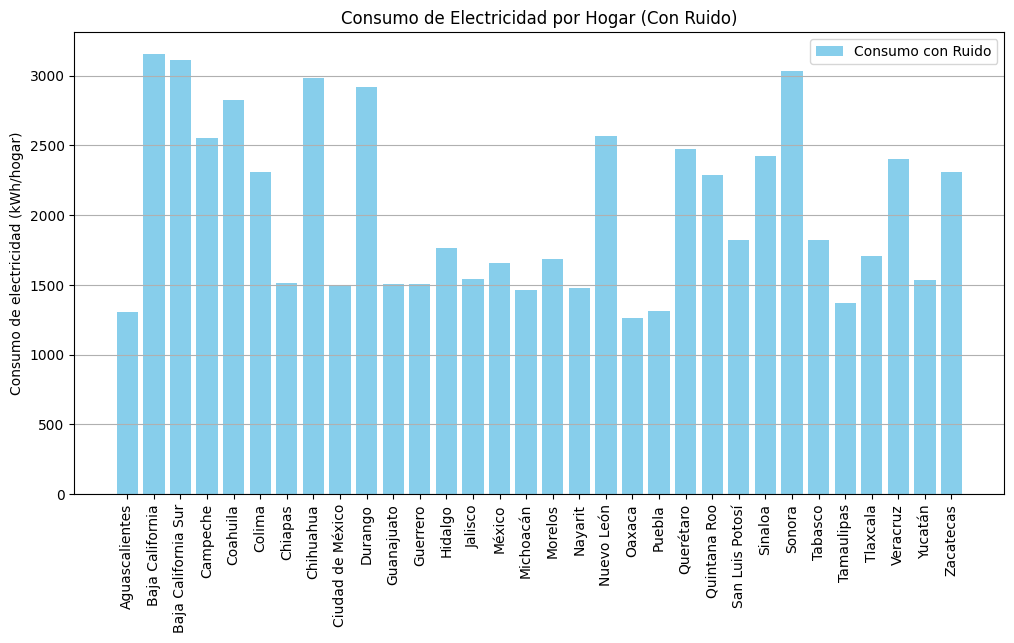

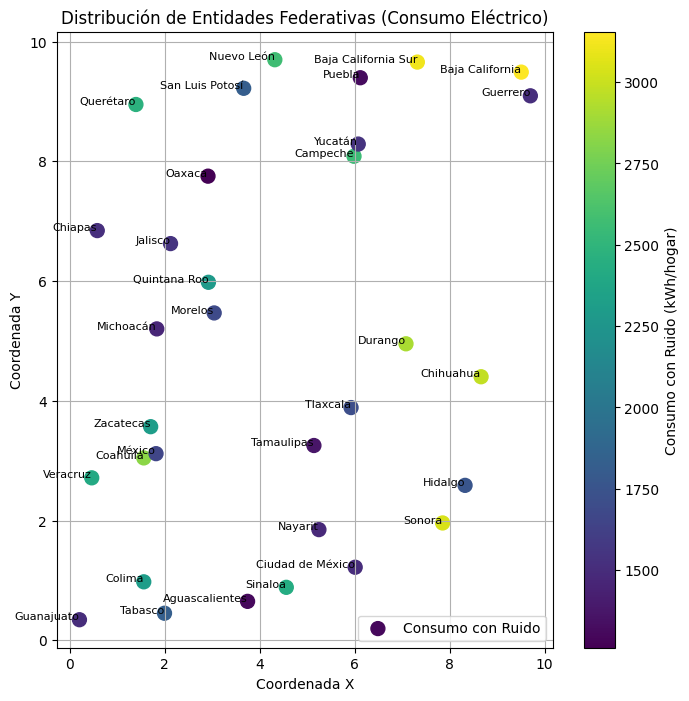

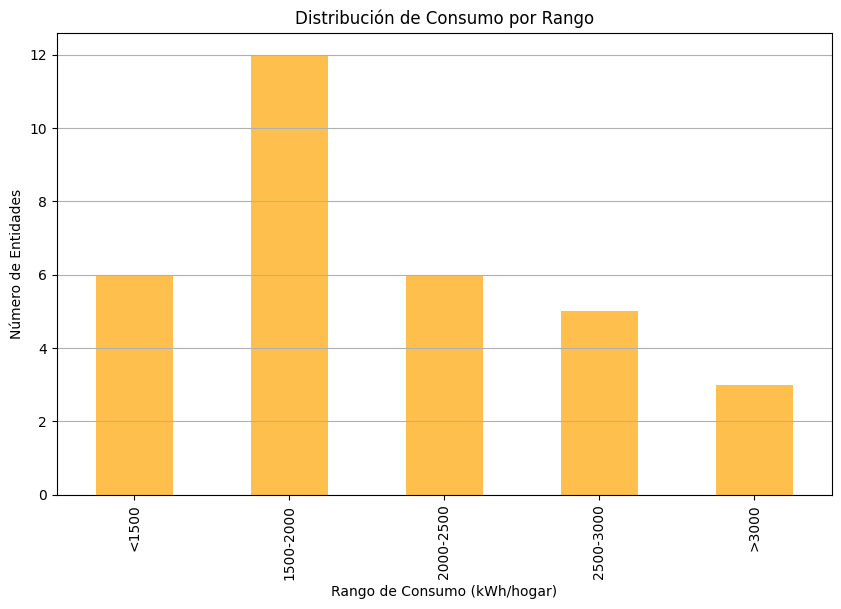

Resumen Estadístico por Rango de Consumo:
                  count         mean         std          min          25%  \
Rango de Consumo                                                             
<1500               6.0  1365.009309   89.230133  1261.104815  1305.634890   
1500-2000          12.0  1630.570154  127.015384  1501.326281  1514.753859   
2000-2500           6.0  2367.606805   75.984416  2289.046410  2306.686220   
2500-3000           5.0  2768.898472  201.026003  2550.531493  2563.808796   
>3000               3.0  3101.342447   59.901205  3036.786129  3074.450278   

                          50%          75%          max  
Rango de Consumo                                         
<1500             1342.133670  1440.780443  1477.552367  
1500-2000         1599.045048  1719.983078  1824.900321  
2000-2500         2357.704232  2418.694476  2472.481185  
2500-3000         2828.442331  2918.158002  2983.551736  
>3000             3112.114427  3133.620606  3155.126785  


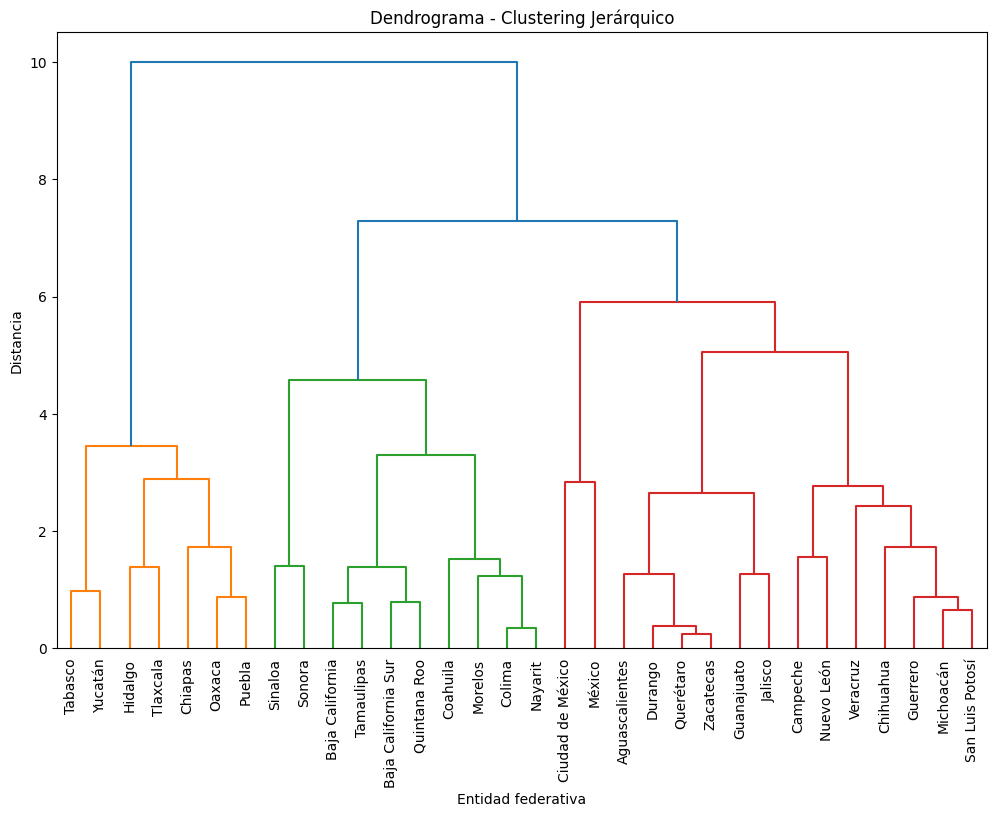

reduced data: [[ 0.20026558 -0.60992964]
 [-2.2556118   0.62857131]
 [-2.42263081  1.24249086]
 [ 0.01175203  1.04520553]
 [-0.99805455 -0.28271822]
 [-1.70886681  0.03117872]
 [ 3.73180177  0.65885074]
 [-0.17531561  0.33502297]
 [-0.98723729 -1.96641366]
 [-0.72010595 -0.9212251 ]
 [-0.08633078 -1.70718379]
 [ 0.70664247 -0.05562963]
 [ 1.76648127  0.04275261]
 [-0.47906125 -1.84902891]
 [ 0.90695046 -3.04938205]
 [ 0.30391463 -0.68476378]
 [-0.54095251 -0.26196587]
 [-1.41178306 -0.13679316]
 [-0.25239283  0.4155369 ]
 [ 2.62663883  0.71331416]
 [ 2.68040818  0.06866192]
 [-0.57643751 -1.00316899]
 [-1.83561221  0.7114351 ]
 [ 0.35022556 -0.19285604]
 [-0.97605939  1.86607276]
 [-1.94971132  1.94477167]
 [ 1.46175765  2.15656148]
 [-1.55180314  0.45440826]
 [ 1.81366008 -0.07213594]
 [ 1.4768576  -0.21106323]
 [ 1.56092115  1.69715842]
 [-0.67031044 -1.00773541]]


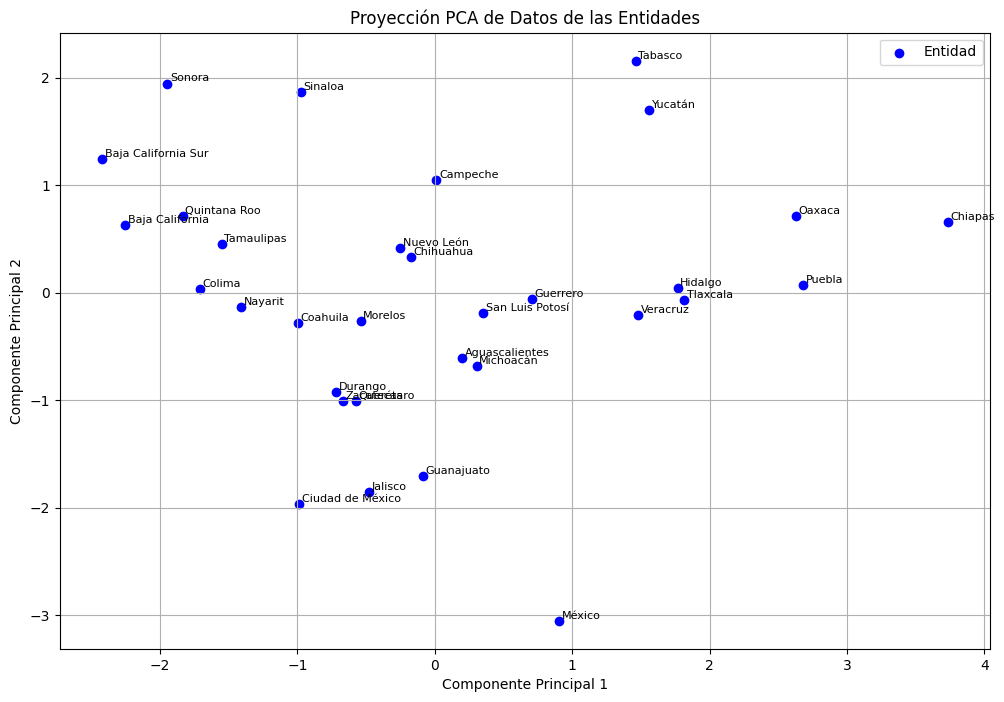

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils.multiclass import unique_labels
import seaborn as sns



# Crear el DataFrame con los datos iniciales. Se considera que cada entidad federativa es un sensor que integra la red IoT de la republica mexicana durante  el año 2016.
data = {
    "Entidad federativa": [
        "Aguascalientes", "Baja California", "Baja California Sur", "Campeche",
        "Coahuila", "Colima", "Chiapas", "Chihuahua", "Ciudad de México",
        "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco",
        "México", "Michoacán", "Morelos", "Nayarit", "Nuevo León",
        "Oaxaca", "Puebla", "Querétaro", "Quintana Roo",
        "San Luis Potosí", "Sinaloa", "Sonora", "Tabasco",
        "Tamaulipas", "Tlaxcala", "Veracruz", "Yucatán",
        "Zacatecas"
    ],
    "Consumo de electricidad (kWh/hogar)": [
        1277.39, 3162.04, 3079.73, 2474.38, 2840.15, 2321.52, 1437.84,
        2945.18, 1524.80, 2891.03, 1527.44, 1531.90, 1750.44, 1639.81,
        1740.19, 1493.02, 1735.47, 1461.84, 2609.21, 1331.72, 1242.58,
        2483.77, 2285.67, 1893.09, 2450.28, 3031.24, 1882.45, 1349.62,
        1735.83, 2420.18, 1567.91, 2213.03
    ]
}

df = pd.DataFrame(data)

# Insertar ruido gaussiano en el consumo de electricidad Generar los datos de cada nodo
np.random.seed(42)
ruido = np.random.normal(0, 50, len(df))  # Media=0, desviación estándar=50
df["Consumo con Ruido"] = df["Consumo de electricidad (kWh/hogar)"] + ruido

# Agrupación de datos por rangos de consumo
bins = [0, 1500, 2000, 2500, 3000, 3500]
labels = ["<1500", "1500-2000", "2000-2500", "2500-3000", ">3000"]
df["Rango de Consumo"] = pd.cut(df["Consumo con Ruido"], bins=bins, labels=labels, include_lowest=True)

# Resumen estadístico por rango
resumen = df.groupby("Rango de Consumo")["Consumo con Ruido"].describe()

# Localización simulada
np.random.seed(42)
df["X"] = np.random.uniform(0, 10, len(df))  # Coordenadas X simuladas
df["Y"] = np.random.uniform(0, 10, len(df))  # Coordenadas Y simuladas

# Visualización 1: Consumo eléctrico por entidad con ruido
plt.figure(figsize=(12, 6))
plt.bar(df["Entidad federativa"], df["Consumo con Ruido"], color="skyblue", label="Consumo con Ruido")
plt.xticks(rotation=90)
plt.ylabel("Consumo de electricidad (kWh/hogar)")
plt.title("Consumo de Electricidad por Hogar (Con Ruido)")
plt.legend()
plt.grid(axis='y')
plt.show()

# Visualización 2: Distribución espacial de entidades
plt.figure(figsize=(8, 8))
plt.scatter(df["X"], df["Y"], c=df["Consumo con Ruido"], cmap="viridis", s=100, label="Consumo con Ruido")
for i, row in df.iterrows():
    plt.annotate(row["Entidad federativa"], (row["X"], row["Y"]), fontsize=8, ha='right')
plt.colorbar(label="Consumo con Ruido (kWh/hogar)")
plt.title("Distribución de Entidades Federativas (Consumo Eléctrico)")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid()
plt.legend()
plt.show()

# Visualización 3: Histograma de consumo eléctrico por rangos
plt.figure(figsize=(10, 6))
df["Rango de Consumo"].value_counts(sort=False).plot(kind="bar", color="orange", alpha=0.7)
plt.title("Distribución de Consumo por Rango")
plt.xlabel("Rango de Consumo (kWh/hogar)")
plt.ylabel("Número de Entidades")
plt.grid(axis='y')
plt.show()

# Mostrar resumen estadístico
print("Resumen Estadístico por Rango de Consumo:")
print(resumen)



# Reconstruir los datos
data = {
    "Entidad federativa": [
        "Aguascalientes", "Baja California", "Baja California Sur", "Campeche", "Coahuila", "Colima", "Chiapas",
        "Chihuahua", "Ciudad de México", "Durango", "Guanajuato", "Guerrero", "Hidalgo", "Jalisco", "México",
        "Michoacán", "Morelos", "Nayarit", "Nuevo León", "Oaxaca", "Puebla", "Querétaro", "Quintana Roo",
        "San Luis Potosí", "Sinaloa", "Sonora", "Tabasco", "Tamaulipas", "Tlaxcala", "Veracruz", "Yucatán", "Zacatecas"
    ],
    "Número de hogares": [
        341.00, 1049.29, 236.45, 252.34, 825.65, 215.58, 1311.01, 1085.42, 2734.16, 481.54, 1498.62, 993.87, 770.49,
        2146.20, 4424.44, 1260.40, 558.52, 352.96, 1405.53, 1085.21, 1652.97, 550.78, 483.81, 752.94, 815.65, 858.25,
        644.36, 1046.51, 320.20, 2299.39, 582.96, 425.77
    ],
    "Personas por hogar": [
        3.97, 3.24, 3.12, 3.70, 3.69, 3.41, 4.11, 3.36, 3.31, 3.74, 4.00, 3.62, 3.81, 3.75, 3.77, 3.72, 3.50, 3.44, 3.77,
        3.73, 3.84, 3.84, 3.23, 3.69, 3.74, 3.41, 3.81, 3.37, 4.10, 3.62, 3.70, 3.80
    ],
    "Consumo de electricidad (kWh/hogar)": [
        1277.39, 3162.04, 3079.73, 2474.38, 2159.91, 1948.70, 1260.79, 1793.23, 1054.90, 1203.03, 1226.86, 1276.80,
        911.26, 1307.48, 856.56, 1290.07, 1332.00, 1748.58, 2967.42, 1107.63, 1033.68, 1269.59, 2551.62, 1344.77,
        4412.92, 4488.42, 3156.87, 2786.17, 1022.30, 1552.94, 2370.29, 1158.00
    ],
    "Consumo de combustibles (tep/hogar)": [
        0.32, 0.17, 0.20, 0.38, 0.22, 0.21, 0.76, 0.42, 0.27, 0.25, 0.24, 0.47, 0.57, 0.24, 0.37, 0.38, 0.34, 0.24,
        0.30, 0.71, 0.67, 0.24, 0.24, 0.41, 0.23, 0.18, 0.55, 0.23, 0.51, 0.55, 0.59, 0.24
    ],
    "Consumo total de energía (tep/hogar)": [
        0.43, 0.44, 0.46, 0.59, 0.41, 0.38, 0.86, 0.57, 0.36, 0.35, 0.35, 0.58, 0.65, 0.35, 0.44, 0.49, 0.45, 0.39,
        0.55, 0.80, 0.76, 0.35, 0.46, 0.52, 0.61, 0.57, 0.82, 0.47, 0.60, 0.68, 0.79, 0.34
    ]
}
df = pd.DataFrame(data)

# Escalar los datos
features = [
    "Número de hogares",
    "Personas por hogar",
    "Consumo de electricidad (kWh/hogar)",
    "Consumo de combustibles (tep/hogar)",
    "Consumo total de energía (tep/hogar)"
]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features])

# Realizar el clustering jerárquico
linkage_matrix = linkage(scaled_data, method="ward")

# Crear el dendrograma
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, labels=df["Entidad federativa"].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Entidad federativa")
plt.ylabel("Distancia")
plt.show()
# PCA (Análisis de Componentes Principales) en combinación con el imputador de KNN (K-Nearest Neighbors).
normalized_data = StandardScaler().fit_transform(df[features])

# Aplicar PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
print("reduced data:", reduced_data)

# Visualización con nombres de las entidades
plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c="blue", label="Entidad")
for i, entidad in enumerate(df["Entidad federativa"]):
    plt.text(reduced_data[i, 0] + 0.02, reduced_data[i, 1] + 0.02, entidad, fontsize=8)
plt.title("Proyección PCA de Datos de las Entidades")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.grid()
plt.show()





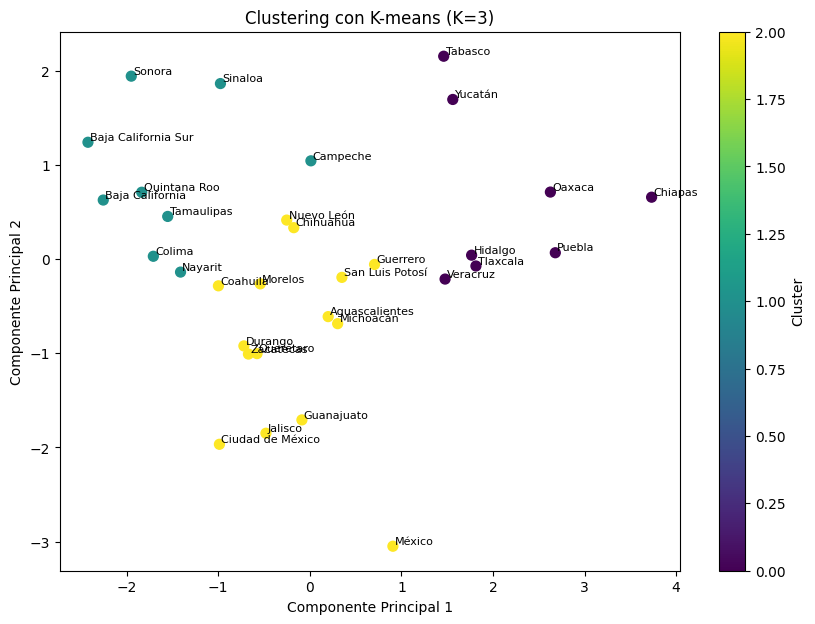

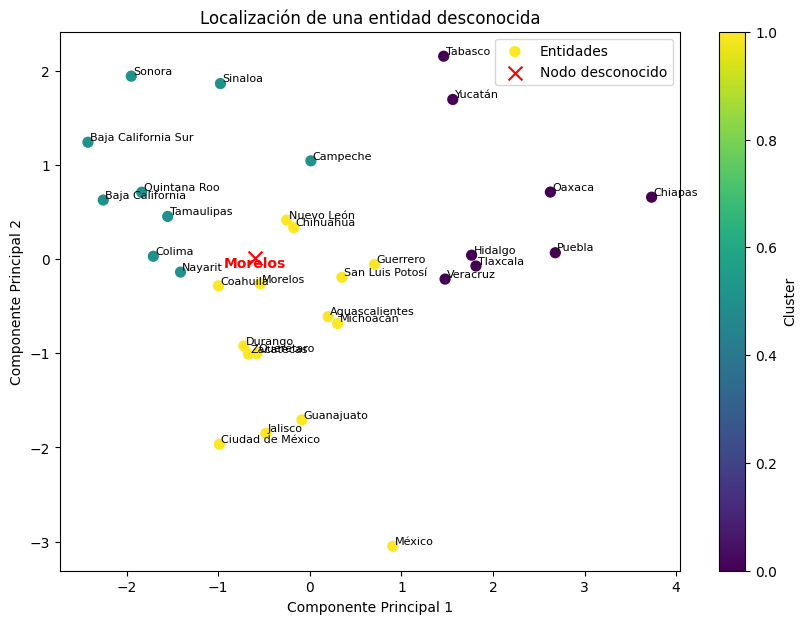


**Reporte del Modelo KNN**

╒══════════════╤═════════════╤══════════╤════════════╤═══════════╤══════════════════════════════════════╕
│ Cluster      │   Precisión │   Recall │   F1-Score │   Soporte │ Entidades                            │
╞══════════════╪═════════════╪══════════╪════════════╪═══════════╪══════════════════════════════════════╡
│ 0            │           1 │        1 │          1 │         2 │ Veracruz, Yucatán                    │
├──────────────┼─────────────┼──────────┼────────────┼───────────┼──────────────────────────────────────┤
│ 1            │           1 │        1 │          1 │         2 │ Sinaloa, Nayarit                     │
├──────────────┼─────────────┼──────────┼────────────┼───────────┼──────────────────────────────────────┤
│ 2            │           1 │        1 │          1 │         3 │ Michoacán, Ciudad de México, Durango │
├──────────────┼─────────────┼──────────┼────────────┼───────────┼──────────────────────────────────────┤
│ Macro Avg    │ 

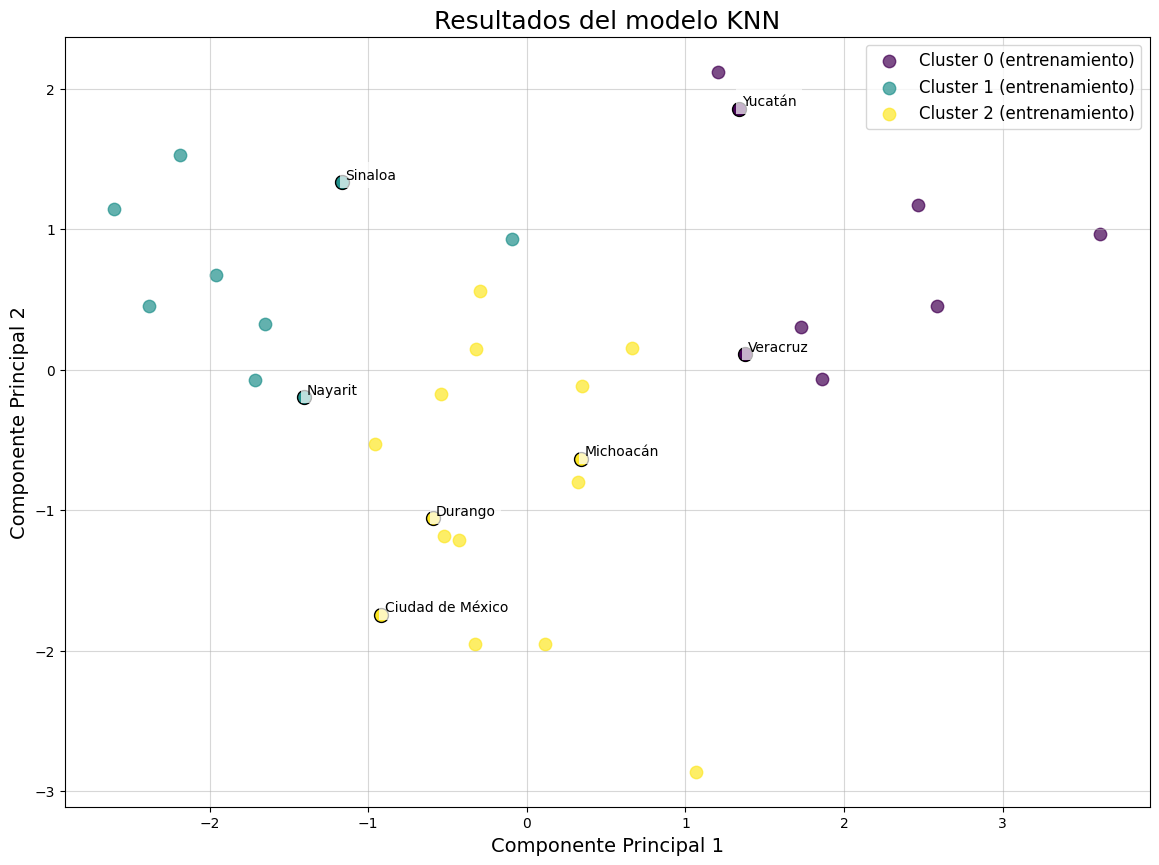

In [3]:
# 1.- Agrupamiento con K-means que ya te habia quedado
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
from tabulate import tabulate
from matplotlib.colors import ListedColormap
from sklearn.metrics.pairwise import euclidean_distances
from scipy.optimize import minimize

# Crear el DataFrame
columns = [
    "Entidad federativa", "Número de hogares", "Personas por hogar",
    "Consumo de electricidad (kWh/hogar)", "Consumo de combustibles (tep/hogar)",
    "Consumo total de energía (tep/hogar)"
]
data = [
    ["Aguascalientes", 341.00, 3.97, 1277.39, 0.32, 0.43],
    ["Baja California", 1049.29, 3.24, 3162.04, 0.17, 0.44],
    ["Baja California Sur", 236.45, 3.12, 3079.73, 0.20, 0.46],
    ["Campeche", 252.34, 3.70, 2474.38, 0.38, 0.59],
    ["Coahuila", 825.65, 3.69, 2159.91, 0.22, 0.41],
    ["Colima", 215.58, 3.41, 1948.70, 0.21, 0.38],
    ["Chiapas", 1311.01, 4.11, 1260.79, 0.76, 0.86],
    ["Chihuahua", 1085.42, 3.36, 1793.23, 0.42, 0.57],
    ["Ciudad de México", 2734.16, 3.31, 1054.90, 0.27, 0.36],
    ["Durango", 481.54, 3.74, 1203.03, 0.25, 0.35],
    ["Guanajuato", 1498.62, 4.00, 1226.86, 0.24, 0.35],
    ["Guerrero", 993.87, 3.62, 1276.80, 0.47, 0.58],
    ["Hidalgo", 770.49, 3.81, 911.26, 0.57, 0.65],
    ["Jalisco", 2146.20, 3.75, 1307.48, 0.24, 0.35],
    ["México", 4424.44, 3.77, 856.56, 0.37, 0.44],
    ["Michoacán", 1260.40, 3.72, 1290.07, 0.38, 0.49],
    ["Morelos", 558.52, 3.50, 1332.00, 0.34, 0.45],
    ["Nayarit", 352.96, 3.44, 1748.58, 0.24, 0.39],
    ["Nuevo León", 1405.53, 3.77, 2967.42, 0.30, 0.55],
    ["Oaxaca", 1085.21, 3.73, 1107.63, 0.71, 0.80],
    ["Puebla", 1652.97, 3.84, 1033.68, 0.67, 0.76],
    ["Querétaro", 550.78, 3.84, 1269.59, 0.24, 0.35],
    ["Quintana Roo", 483.81, 3.23, 2551.62, 0.24, 0.46],
    ["San Luis Potosí", 752.94, 3.69, 1344.77, 0.41, 0.52],
    ["Sinaloa", 815.65, 3.74, 4412.92, 0.23, 0.61],
    ["Sonora", 858.25, 3.41, 4488.42, 0.18, 0.57],
    ["Tabasco", 644.36, 3.81, 3156.87, 0.55, 0.82],
    ["Tamaulipas", 1046.51, 3.37, 2786.17, 0.23, 0.47],
    ["Tlaxcala", 320.20, 4.10, 1022.30, 0.51, 0.60],
    ["Veracruz", 2299.39, 3.62, 1552.94, 0.55, 0.68],
    ["Yucatán", 582.96, 3.70, 2370.29, 0.59, 0.79],
    ["Zacatecas", 425.77, 3.80, 1158.00, 0.24, 0.34]
]

df = pd.DataFrame(data, columns=columns)

# Imputar valores faltantes (si existen)
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df.iloc[:, 1:])

# Normalizar los datos
normalized_data = (imputed_data - np.mean(imputed_data, axis=0)) / np.std(imputed_data, axis=0)

# PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)




# K-means con el número óptimo de clusters
k_optimal = 3  #
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Visualización de clusters
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="viridis", s=50)
for i, entidad in enumerate(df["Entidad federativa"]):
    plt.text(reduced_data[i, 0] + 0.02, reduced_data[i, 1] + 0.02, entidad, fontsize=8)
plt.title(f"Clustering con K-means (K={k_optimal})")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.show()


#2.- Localización de un nodo desconocido de las entidades federativas con su ubicación

# Definir las características del nodo desconocido (ejemplo)
unknown_node = np.array([[500, 3.5, 1500, 0.3, 0.5]])

# Normalizar el nodo desconocido usando las estadísticas de los datos originales
unknown_node_normalized = (unknown_node - np.mean(imputed_data, axis=0)) / np.std(imputed_data, axis=0)

# Proyectar el nodo desconocido al espacio PCA
unknown_node_pca = pca.transform(unknown_node_normalized)

# Calcular la distancia entre el nodo desconocido y todas las entidades
distancias = pairwise_distances(unknown_node_pca, reduced_data)
indice_cercano = distancias.argmin()
entidad_cercana = df["Entidad federativa"].iloc[indice_cercano]

# Gráfica con el nodo desconocido y el nombre de la entidad más cercana
plt.figure(figsize=(10, 7))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=clusters, cmap="viridis", s=50, label="Entidades")
plt.scatter(unknown_node_pca[:, 0], unknown_node_pca[:, 1], c="red", s=100, label="Nodo desconocido", marker="x")

# Etiquetas de las entidades
for i, entidad in enumerate(df["Entidad federativa"]):
    plt.text(reduced_data[i, 0] + 0.02, reduced_data[i, 1] + 0.02, entidad, fontsize=8)

# Nombre de la entidad más cercana directamente sobre el nodo desconocido
plt.text(
    unknown_node_pca[0, 0],
    unknown_node_pca[0, 1] - 0.1,
    f"{entidad_cercana}",
    color="red",
    fontsize=10,
    fontweight="bold",
    ha="center"
)

plt.title("Localización de una entidad desconocida")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend()
plt.colorbar(label="Cluster")
plt.show()




#3.- Aplicar KNN del primer Dataframe aplicando Distancia Euclidian

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test, entidades_train, entidades_test = train_test_split(
    normalized_data, clusters, df["Entidad federativa"], test_size=0.2, random_state=42
)

# Crear y entrenar el modelo KNN
k_neighbors = 5  # Número de vecinos
knn = KNeighborsClassifier(n_neighbors=k_neighbors, metric="euclidean")  # Aplicación de distancia euclidiana
knn.fit(X_train, y_train)

# Predicción
y_pred = knn.predict(X_test)

# Reporte de clasificación
reporte = classification_report(y_test, y_pred, output_dict=True)
reporte_df = pd.DataFrame(reporte).transpose()

# Añadir las entidades correspondientes a cada cluster al reporte
reporte_df["Entidades"] = ""
for cluster in np.unique(y_test):
    indices = np.where(y_test == cluster)[0]
    entidades_cluster = entidades_test.iloc[indices]
    reporte_df.loc[str(cluster), "Entidades"] = ", ".join(entidades_cluster)

# Eliminar la columna de entidades para filas agregadas
reporte_df.loc[["accuracy", "macro avg", "weighted avg"], "Entidades"] = np.nan

# Crear tabla con formato personalizado
def generar_reporte_tabla(reporte_df):
    # Crear lista para la tabla
    tabla = []

    # Añadir filas de clusters
    for cluster in np.unique(y_test):
        fila = [
            cluster,
            f"{reporte_df.loc[str(cluster), 'precision']:.2f}",
            f"{reporte_df.loc[str(cluster), 'recall']:.2f}",
            f"{reporte_df.loc[str(cluster), 'f1-score']:.2f}",
            int(reporte_df.loc[str(cluster), 'support']),
            reporte_df.loc[str(cluster), 'Entidades'],
        ]
        tabla.append(fila)

    # Añadir métricas agregadas
    for avg in ["macro avg", "weighted avg"]:
        fila = [
            avg.title(),
            f"{reporte_df.loc[avg, 'precision']:.2f}",
            f"{reporte_df.loc[avg, 'recall']:.2f}",
            f"{reporte_df.loc[avg, 'f1-score']:.2f}",
            int(reporte_df.loc[avg, 'support']),
            "",
        ]
        tabla.append(fila)

    # Crear encabezados
    headers = ["Cluster", "Precisión", "Recall", "F1-Score", "Soporte", "Entidades"]

    # Imprimir tabla estilizada
    print("\n**Reporte del Modelo KNN**\n")
    print(tabulate(tabla, headers=headers, tablefmt="fancy_grid"))

# Generar y mostrar el reporte
generar_reporte_tabla(reporte_df)

# Identificar a qué cluster pertenece el nodo desconocido
cluster_nodo_desconocido = knn.predict([X_test[2]])[0]
print(f"\nEl nodo desconocido pertenece al cluster: {cluster_nodo_desconocido}")

# Visualización de resultados
# Reducción de dimensionalidad para graficar
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)
X_test_2d = pca.transform(X_test)

# Crear paleta de colores discreta
num_clusters = len(np.unique(y_train))
cmap = ListedColormap(plt.cm.viridis(np.linspace(0, 1, num_clusters)))

plt.figure(figsize=(14, 10))

# Graficar puntos de entrenamiento por cluster
for cluster in np.unique(y_train):
    indices = np.where(y_train == cluster)
    plt.scatter(
        X_train_2d[indices, 0], X_train_2d[indices, 1],
        color=cmap(cluster), label=f"Cluster {cluster} (entrenamiento)", s=80, alpha=0.7
    )

# Graficar los puntos de prueba con etiquetas
for i, entidad in enumerate(entidades_test):
    plt.scatter(
        X_test_2d[i, 0], X_test_2d[i, 1],
        color=cmap(y_pred[i]), edgecolor='black', s=100, marker="o"
    )
    plt.text(
        X_test_2d[i, 0] + 0.02, X_test_2d[i, 1] + 0.02, entidad,
        fontsize=10, bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )

# Configuración de la gráfica
plt.title("Resultados del modelo KNN", fontsize=18)
plt.xlabel("Componente Principal 1", fontsize=14)
plt.ylabel("Componente Principal 2", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.5)
plt.show()